<a href="https://colab.research.google.com/github/NeyoxDrago/Computer-Vision-Projects/blob/main/Digit_detection_using_SVHN_Dataset/digit_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import os

# def restart_runtime():
#   os.kill(os.getpid(), 9)

# if keras.__version__ == "2.2.5":
#   !pip install --upgrade keras
#   restart_runtime()
  
keras.__version__

'2.4.3'

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz
!wget http://ufldl.stanford.edu/housenumbers/extra.tar.gz
!tar -xzf train.tar.gz
!tar -xzf test.tar.gz
!tar -xzf extra.tar.gz

--2020-12-29 14:08:04--  http://ufldl.stanford.edu/housenumbers/train.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404141560 (385M) [application/x-gzip]
Saving to: ‘train.tar.gz.1’

train.tar.gz.1       45%[========>           ] 173.85M  21.7MB/s    eta 11s    

In [ ]:
import os
print("Testing Images",len(os.listdir("test")))
print("Training Images",len(os.listdir("train")))
print("Extra Images",len(os.listdir("extra")))

In [ ]:
!git clone https://github.com/NeyoxDrago/digit_detection_SVHN_dataset.git

In [ ]:
!cp -rf digit_detection_SVHN_dataset/* /content/
!rm -rf digit_detection_SVHN_dataset

In [ ]:
%%time
import json
with open("json.json","r") as file:
  data_train = json.load(file)

with open("digitStructExtra.json","r") as file:
  data_extra = json.load(file)


In [ ]:
def get_detail(data,name):
  l=[]
  for i in data:
    l.append(i[name])
  return l

In [ ]:
import pandas as pd
import numpy as np

df= pd.DataFrame.from_dict(data_train)
df['y2'] = df.boxes.apply(lambda x:np.sum([get_detail(x,"height"),get_detail(x,"top")],axis=0))
df['y1'] = df.boxes.apply(lambda x:get_detail(x,"top"))
df['class_name'] = df.boxes.apply(lambda x:get_detail(x,"label"))
df['x2'] = df.boxes.apply(lambda x:np.sum([get_detail(x,"width"),get_detail(x,"left")],axis=0))
df['x1'] = df.boxes.apply(lambda x:get_detail(x,"left"))
df['num_boxes'] = df.boxes.apply(lambda x :len(x))

In [ ]:
df.head()

In [ ]:
from tqdm.notebook import tqdm
data = []
for i,row in tqdm(df.iterrows(),total=df.shape[0]):
  for j in range(row.num_boxes):
    temp = ["train/"+row.filename,int(row.x1[j]),int(row.y1[j]),int(row.x2[j]),int(row.y2[j]),int(row.class_name[j])]
    data.append(temp)

df = pd.DataFrame(data = data , columns=['filename',"x1","y1","x2","y2","class_name"])
# df.to_csv("train_data.csv",index=None)

In [ ]:
df2= pd.DataFrame.from_dict(data_extra)
df2['y2'] = df2.boxes.apply(lambda x:np.sum([get_detail(x,"height"),get_detail(x,"top")],axis=0))
df2['y1'] = df2.boxes.apply(lambda x:get_detail(x,"top"))
df2['class_name'] = df2.boxes.apply(lambda x:get_detail(x,"label"))
df2['x2'] = df2.boxes.apply(lambda x:np.sum([get_detail(x,"width"),get_detail(x,"left")],axis=0))
df2['x1'] = df2.boxes.apply(lambda x:get_detail(x,"left"))
df2['num_boxes'] = df2.boxes.apply(lambda x :len(x))

data = []
for i,row in tqdm(df2.iterrows(),total=df2.shape[0]):
  for j in range(row.num_boxes):
    temp = ["extra/"+row.filename,int(row.x1[j]),int(row.y1[j]),int(row.x2[j]),int(row.y2[j]),int(row.class_name[j])]
    data.append(temp)
df2 = pd.DataFrame(data = data , columns=['filename',"x1","y1","x2","y2","class_name"])


In [ ]:
pd.concat([df,df2]).to_csv("train_data.csv",index=None)

# Main code Section
Main Code Below

In [10]:
import pandas as pd
df = pd.read_csv("train_data.csv")

In [11]:
df.class_name = df.class_name.apply(lambda x: 0 if x == 10 else x)

In [12]:
df.to_csv("train_data.csv",index=None)

In [13]:
df.head()

,filename,x1,y1,x2,y2,class_name
0,train/1.png,246,77,327,296,1
1,train/1.png,323,81,419,300,9
2,train/2.png,77,29,100,61,2
3,train/2.png,98,25,124,57,3
4,train/3.png,17,5,25,20,2


In [14]:
import os
if not os.path.exists("train"):
  !wget http://ufldl.stanford.edu/housenumbers/train.tar.gz
  !tar -xzf train.tar.gz

if not os.path.exists("test"):
  !wget http://ufldl.stanford.edu/housenumbers/test.tar.gz
  !tar -xzf test.tar.gz

In [15]:
from config import Config
class digitConfig(Config):
  pass

In [16]:
import cv2
import numpy as np
from tqdm.notebook import tqdm

def get_data(input_df,set_type="training"):
  
  all_imgs = {}

  for _,row in tqdm(input_df.iterrows(),total=input_df.shape[0]):
    filename,x1,y1,x2,y2,class_name = row.values

    if filename not in all_imgs:
      all_imgs[filename] = {}
      img = cv2.imread(filename)
      (rows,cols) = img.shape[:2]
      all_imgs[filename]['filepath'] = filename
      all_imgs[filename]['width'] = cols
      all_imgs[filename]['height'] = rows
      all_imgs[filename]['bboxes'] = []
      all_imgs[filename]['imageset'] = set_type
      
    all_imgs[filename]['bboxes'].append({'class': class_name, 'x1': int(x1), 'x2': int(x2), 'y1': int(y1), 'y2': int(y2)})
      
    
  all_data = []
  for key,values in all_imgs.items():
    all_data.append(values)
            
  return all_data

In [17]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
training , validation = train_test_split(df,test_size=0.2,shuffle=True, random_state=7)

In [18]:
all_images_train  = get_data(training)
all_images_test = get_data(validation,set_type="validation")
classes_count = df.groupby('class_name')['filename'].count().to_dict()
class_mapping = dict((w,w) for i,w in enumerate(df.class_name.unique()))
class_mapping['bg'] = len(class_mapping)
class_mapping

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 'bg': 10}

In [19]:
if 'bg' not in classes_count:
  classes_count['bg'] = 0

In [20]:
config = digitConfig()
config.class_mapping = class_mapping
config.base_net_weights = "resnet50_weights_tf_dim_ordering_tf_kernels.h5"

In [21]:
import pickle
with open("config_file.pickle","wb") as output:
  pickle.dump(config,output)

In [22]:
import random

train_imgs = [s for s in all_images_train]
val_imgs = [s for s in all_images_test]

print('Num train samples {}'.format(len(train_imgs)))
print('Num val samples {}'.format(len(val_imgs)))

Num train samples 228172
Num val samples 101006


In [23]:
from neural_work_files import *
import data_generators

data_gen_train = data_generators.get_anchor_gt(all_images_train, classes_count, config, get_img_output_length, "channels_last", mode='train')
data_gen_val = data_generators.get_anchor_gt(all_images_test, classes_count, config, get_img_output_length,"channels_last", mode='val')


In [24]:
print(next(data_gen_train)[0].shape)
print(next(data_gen_train)[0].shape)
print(next(data_gen_train)[0].shape)

(1, 600, 1112, 3)
(1, 600, 1342, 3)
(1, 600, 1342, 3)


In [25]:
import neural_work_files as neural

img_input = Input(shape=(None,None,3)) ## channels last according to tensorflow
roi_input = Input(shape=(None, 4))

# define the base network (resnet here, can be VGG, Inception, etc)
shared_layers = neural.nn_base(img_input, trainable=True)

# define the RPN, built on the base layers
num_anchors = len(config.anchor_box_scales) * len(config.anchor_box_ratios)
print(num_anchors)
print(shared_layers)
rpn_layer = neural.rpn(shared_layers, num_anchors)
print(rpn_layer)
classifier = neural.classifier(shared_layers, roi_input, config.num_rois,
                               nb_classes=len(classes_count),
                               trainable=True)

9
KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 1024), dtype=tf.float32, name=None), name='activation_39/Relu:0', description="created by layer 'activation_39'")
[<KerasTensor: shape=(None, None, None, 9) dtype=float32 (created by layer 'rpn_out_class')>, <KerasTensor: shape=(None, None, None, 36) dtype=float32 (created by layer 'rpn_out_regress')>, <KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'activation_39')>]


In [26]:
import os
if not os.path.exists("resnet50_weights_tf_dim_ordering_tf_kernels.h5"):
  !wget https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5

In [34]:
from keras.utils import generic_utils
import roi_helpers
import warnings
import numpy as np
import os
import tensorflow as tf
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.optimizers import Adam
import losses
from keras.models import Model
model_rpn = Model(img_input, rpn_layer[:2])
model_classifier = Model([img_input, roi_input], classifier)
model_all = Model([img_input, roi_input], rpn_layer[:2] + classifier)

try:
	print('loading weights from {}'.format(config.base_net_weights))
	model_rpn.load_weights(config.base_net_weights, by_name=True)
	model_classifier.load_weights(config.base_net_weights, by_name=True)
except:
	print('Could not load pretrained model weights. Weights can be found in the keras application folder \
		https://github.com/fchollet/keras/tree/master/keras/applications')

optimizer = Adam(lr=1e-5)
optimizer_classifier = Adam(lr=1e-5)
model_rpn.compile(optimizer=optimizer, loss=[losses.rpn_loss_cls(num_anchors), losses.rpn_loss_regr(num_anchors)])
model_classifier.compile(optimizer=optimizer_classifier, loss=[losses.class_loss_cls, losses.class_loss_regr(len(classes_count)-1)],
                         metrics={'dense_class_{}'.format(len(classes_count)): 'accuracy'})

model_all.compile(optimizer='adam', loss='mae')

epoch_length = 1000
num_epochs = 15
vis = True

import time
losses_array = np.zeros((epoch_length, 5))
rpn_accuracy_rpn_monitor = []
rpn_accuracy_for_epoch = []

best_loss = np.Inf

class_mapping_inv = {v: k for k, v in class_mapping.items()}
print('Starting training')


for epoch_num in range(num_epochs):
  progbar = generic_utils.Progbar(epoch_length)
  start_time = time.time()
  print('Epoch {}/{}'.format(epoch_num + 1, num_epochs))
  iter_num = 0

  save_model_path = f"model_frcnn_epoch_{epoch_num + 1}.h5"
  start_time = time.time()

  if os.path.exists(save_model_path):
    print("#############  Found pre trained Weights. Loading weights and Skipping this epoch.")
    model_all.load_weights(save_model_path)
    continue

  while True:
    if len(rpn_accuracy_rpn_monitor) == epoch_length-1 and config.verbose:
      mean_overlapping_bboxes = float(sum(rpn_accuracy_rpn_monitor))/len(rpn_accuracy_rpn_monitor)
      rpn_accuracy_rpn_monitor = []
      print('\n #############################   Average number of overlapping bounding boxes from RPN = {} for {} previous iterations    #############################'.format(mean_overlapping_bboxes, epoch_length))
      if mean_overlapping_bboxes == 0:
        print('\n #############################   RPN is not producing bounding boxes that overlap the ground truth boxes. Check RPN settings or keep training.   #############################')
        
    X, Y, img_data = next(data_gen_train)
    loss_rpn = model_rpn.train_on_batch(X, Y)
    P_rpn = model_rpn.predict_on_batch(X)
    
    R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], config, 'channels_last' , use_regr=True, overlap_thresh=0.6, max_boxes=300)
    # note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
    X2, Y1, Y2, IouS = roi_helpers.calc_iou(R, img_data, config, class_mapping)

    if X2 is None:
      rpn_accuracy_rpn_monitor.append(0)
      rpn_accuracy_for_epoch.append(0)
      continue

    neg_samples = np.where(Y1[0, :, -1] == 1)
    pos_samples = np.where(Y1[0, :, -1] == 0)

    if len(neg_samples) > 0:
      neg_samples = neg_samples[0]
    else:
      neg_samples = []

    if len(pos_samples) > 0:
      pos_samples = pos_samples[0]
    else:
      pos_samples = []
    
    rpn_accuracy_rpn_monitor.append(len(pos_samples))
    rpn_accuracy_for_epoch.append((len(pos_samples)))

    if config.num_rois > 1:
      if len(pos_samples) < config.num_rois//2:
        selected_pos_samples = pos_samples.tolist()
      else:
        selected_pos_samples = np.random.choice(pos_samples, config.num_rois//2, replace=False).tolist()
      try:
        selected_neg_samples = np.random.choice(neg_samples, config.num_rois - len(selected_pos_samples), replace=False).tolist()
      except:
        selected_neg_samples = np.random.choice(neg_samples, config.num_rois - len(selected_pos_samples), replace=True).tolist()

      sel_samples = selected_pos_samples + selected_neg_samples
    else:
      # in the extreme case where num_rois = 1, we pick a random pos or neg sample
      selected_pos_samples = pos_samples.tolist()
      selected_neg_samples = neg_samples.tolist()
      if np.random.randint(0, 2):
        sel_samples = random.choice(neg_samples)
      else:
        sel_samples = random.choice(pos_samples)

    # print(sel_samples)
    loss_class = model_classifier.train_on_batch([X, X2[:, sel_samples, :]], [Y1[:, sel_samples, :], Y2[:, sel_samples, :]])

    losses_array[iter_num, 0] = loss_rpn[1]
    losses_array[iter_num, 1] = loss_rpn[2]
    losses_array[iter_num, 2] = loss_class[1]
    losses_array[iter_num, 3] = loss_class[2]
    losses_array[iter_num, 4] = loss_class[3]

    progbar.update(iter_num, [('rpn_cls', losses_array[iter_num, 0]), ('rpn_regr', losses_array[iter_num, 1]),
                  ('detector_cls', losses_array[iter_num, 2]), ('detector_regr', losses_array[iter_num, 3])])

    iter_num += 1
    
    if iter_num ==  (epoch_length-1):

      loss_rpn_cls = np.mean(losses_array[:, 0])
      loss_rpn_regr = np.mean(losses_array[:, 1])
      loss_class_cls = np.mean(losses_array[:, 2])
      loss_class_regr = np.mean(losses_array[:, 3])
      class_acc = np.mean(losses_array[:, 4])

      mean_overlapping_bboxes = float(sum(rpn_accuracy_for_epoch)) / len(rpn_accuracy_for_epoch)
      rpn_accuracy_for_epoch = []

      curr_loss = loss_rpn_cls + loss_rpn_regr + loss_class_cls + loss_class_regr
      # print("ENDING")

      if curr_loss < best_loss:
        if config.verbose:
          print("\n\n############  Epoch Results ::\n")
          print('############  Mean number of bounding boxes from RPN overlapping ground truth boxes: {}'.format(mean_overlapping_bboxes))
          print('############  Classifier accuracy for bounding boxes from RPN: {}'.format(class_acc))
          print('############  Loss RPN classifier: {}'.format(loss_rpn_cls))
          print('############  Loss RPN regression: {}'.format(loss_rpn_regr))
          print('############  Loss Detector classifier: {}'.format(loss_class_cls))
          print('############  Loss Detector regression: {}'.format(loss_class_regr))
          print('############  Elapsed time: {} minutes'.format((time.time() - start_time)/60))
          print('Total loss decreased from {} to {}, saving weights'.format(best_loss,curr_loss))
      
        best_loss = curr_loss

        model_all.save_weights(save_model_path)
        print('\n',"-"*100,"\n")
      
      break

		# except Exception as e:
		# 	print('Exception: {}'.format(e))
		# 	break

print('Training complete, exiting.')

loading weights from resnet50_weights_tf_dim_ordering_tf_kernels.h5
Starting training
Epoch 1/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 2/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 3/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 4/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 5/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 6/15
#############  Found pre trained Weights. Loading weights and Skipping this epoch.
Epoch 7/15
 998/1000 [============================>.] - ETA: 1s - rpn_cls: 0.8331 - rpn_regr: 0.0833 - detector_cls: 0.5364 - detector_regr: 0.2321

############  Epoch Results ::

############  Mean number of bounding boxes from RPN overlapping ground truth boxes: 11.425425425425425
############  Classifier accuracy for bounding boxes from RPN: 0.

# Testing time

In [35]:
from neural_work_files import *
import pickle 
import numpy as np

config_output_filename = "config_file.pickle"

with open(config_output_filename, 'rb') as f_in:
	config = pickle.load(f_in)


# turn off any data augmentation at test time
config.use_horizontal_flips = False
config.use_vertical_flips = False
config.rot_90 = False

img_path = "train"

def format_img_size(img, config):
	""" formats the image size based on config """
	img_min_side = float(config.im_size)
	(height,width,_) = img.shape
		
	if width <= height:
		ratio = img_min_side/width
		new_height = int(ratio * height)
		new_width = int(img_min_side)
	else:
		ratio = img_min_side/height
		new_width = int(ratio * width)
		new_height = int(img_min_side)
	img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
	return img, ratio	

def format_img_channels(img, config):
	""" formats the image channels based on config """
	img = img[:, :, (2, 1, 0)]
	img = img.astype(np.float32)
	img[:, :, 0] -= config.img_channel_mean[0]
	img[:, :, 1] -= config.img_channel_mean[1]
	img[:, :, 2] -= config.img_channel_mean[2]
	img /= config.img_scaling_factor
	img = np.transpose(img, (2, 0, 1))
	img = np.expand_dims(img, axis=0)
	return img

def format_img(img, config):
	""" formats an image for model prediction based on config """
	img, ratio = format_img_size(img, config)
	img = format_img_channels(img, config)
	return img, ratio

# Method to transform the coordinates of the bounding box to its original size
def get_real_coordinates(ratio, x1, y1, x2, y2):

	real_x1 = int(round(x1 // ratio))
	real_y1 = int(round(y1 // ratio))
	real_x2 = int(round(x2 // ratio))
	real_y2 = int(round(y2 // ratio))

	return (real_x1, real_y1, real_x2 ,real_y2)

class_mapping = config.class_mapping

if 'bg' not in class_mapping:
	class_mapping['bg'] = len(class_mapping)

class_mapping = {v: k for k, v in class_mapping.items()}
print(class_mapping)
class_to_color = {class_mapping[v]: np.random.randint(0, 255, 3) for v in class_mapping}

if config.network == 'resnet50':
	num_features = 1024
elif config.network == 'vgg':
	num_features = 512

input_shape_img = (None, None, 3)
input_shape_features = (None, None, num_features)


{1: 1, 9: 9, 2: 2, 3: 3, 5: 5, 8: 8, 7: 7, 4: 4, 6: 6, 0: 0, 10: 'bg'}


In [36]:
img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(config.num_rois, 4))
feature_map_input = Input(shape=input_shape_features)
img_input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_3')>

In [40]:
from keras.models import Model
img_input = Input(shape=input_shape_img)
roi_input = Input(shape=(config.num_rois, 4))
feature_map_input = Input(shape=input_shape_features)

import neural_work_files as nf
# define the base network (resnet here, can be VGG, Inception, etc)
shared_layers = nf.nn_base(img_input, trainable=True)

# define the RPN, built on the base layers
num_anchors = len(config.anchor_box_scales) * len(config.anchor_box_ratios)
rpn_layers = rpn(shared_layers, num_anchors)

classifier = nf.classifier(feature_map_input, roi_input, config.num_rois, nb_classes=len(class_mapping), trainable=True)

model_rpn = Model(img_input, rpn_layers)
model_classifier_only = Model([feature_map_input, roi_input], classifier)

model_classifier = Model([feature_map_input, roi_input], classifier)

# print('Loading weights from {}'.format(config.))
model_rpn.load_weights("model_frcnn_epoch_12.h5", by_name=True)
model_classifier.load_weights("model_frcnn_epoch_12.h5", by_name=True)

model_rpn.compile(optimizer='adam', loss='mse')
model_classifier.compile(optimizer='adam', loss='mse')


1.png
Elapsed time = 4.283407926559448
[(1, 89.04001712799072), (1, 83.23894143104553)]


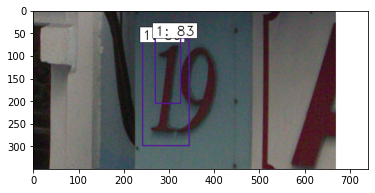

10.png
Elapsed time = 4.1886210441589355
[(1, 95.88480591773987), (6, 80.3807020187378)]


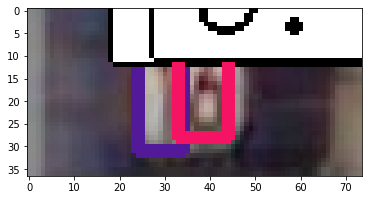

100.png
Elapsed time = 4.440950870513916
[(9, 95.24794220924377)]


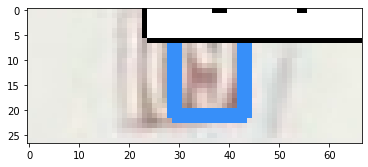

1000.png
Elapsed time = 4.226989030838013
[]


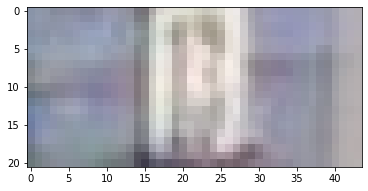

10000.png
Elapsed time = 4.2880308628082275
[(3, 98.12559485435486), (3, 87.1386170387268), (5, 95.51954865455627), (1, 98.06770086288452)]


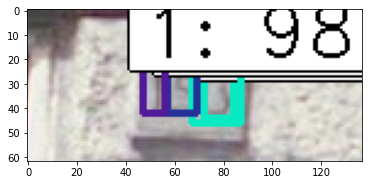

10001.png
Elapsed time = 4.211715936660767
[(1, 90.28950333595276), (1, 89.09785747528076), (1, 88.6686623096466), (1, 87.12400197982788), (1, 85.91911792755127), (1, 84.88100171089172)]


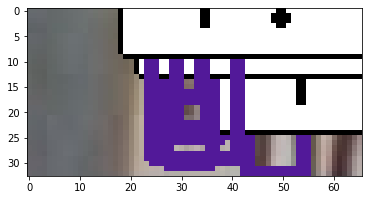

10002.png
Elapsed time = 4.687228202819824
[(2, 85.1667582988739), (1, 94.24102902412415)]


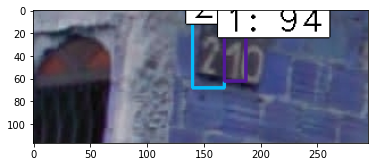

10003.png
Elapsed time = 4.413980960845947
[(5, 83.01303386688232)]


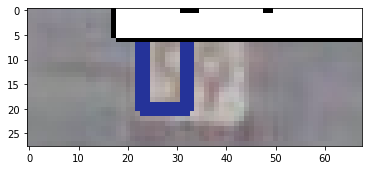

10004.png
Elapsed time = 4.396126747131348
[(8, 97.36496210098267), (8, 97.14478850364685), (8, 96.33640646934509), (8, 85.21131873130798)]


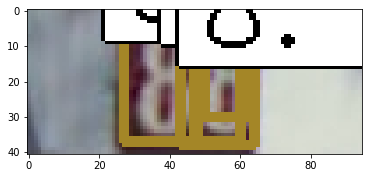

10005.png
Elapsed time = 4.4131364822387695
[(1, 96.29923701286316)]


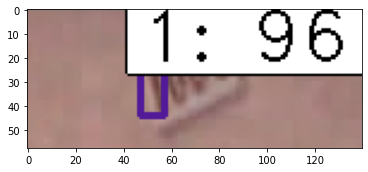

10006.png
Elapsed time = 4.363548994064331
[(2, 95.90092301368713), (4, 96.49242758750916), (4, 80.36339282989502), (4, 80.23012280464172)]


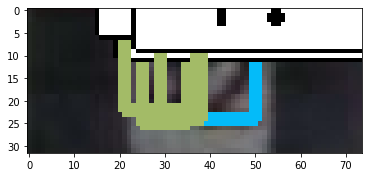

10007.png
Elapsed time = 4.131263494491577
[(1, 95.7243800163269), (1, 93.10773015022278)]


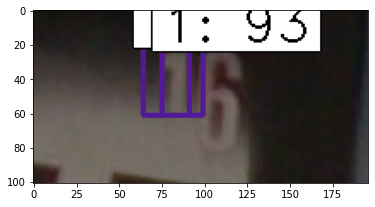

10008.png
Elapsed time = 4.204216003417969
[]


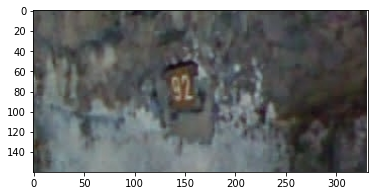

10009.png
Elapsed time = 4.863840341567993
[(1, 93.74921917915344)]


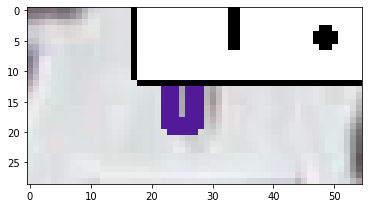

1001.png
Elapsed time = 4.272023916244507
[]


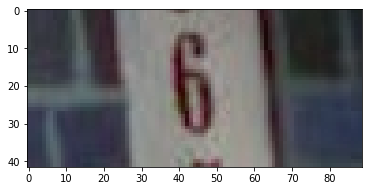

10010.png
Elapsed time = 4.1743857860565186
[(3, 88.3777916431427), (1, 97.17757105827332), (1, 80.63322305679321)]


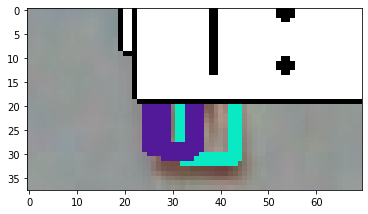

10011.png
Elapsed time = 4.37594199180603
[(3, 99.38586354255676), (3, 99.14702773094177), (3, 94.85602974891663), (3, 94.37360167503357), (3, 87.21973896026611), (1, 93.71928572654724), (1, 83.26714038848877)]


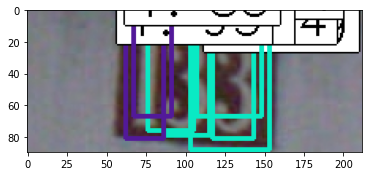

10012.png
Elapsed time = 4.304504871368408
[(2, 98.1094479560852), (2, 95.65665125846863), (9, 96.10252976417542), (9, 83.1469178199768)]


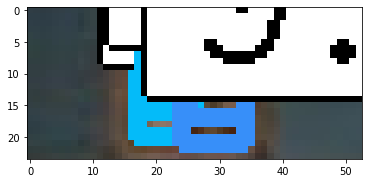

10013.png
Elapsed time = 4.157478332519531
[]


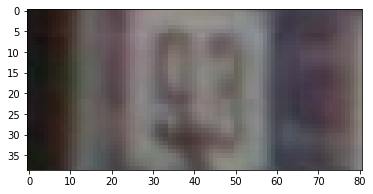

10014.png
Elapsed time = 4.609229564666748
[(1, 91.16921424865723), (3, 94.30425763130188), (3, 83.60503315925598), (5, 98.21719527244568), (5, 92.98145174980164)]


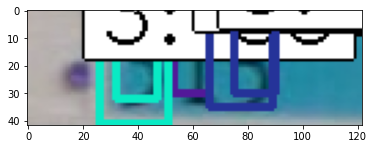

10015.png
Elapsed time = 4.133443117141724
[]


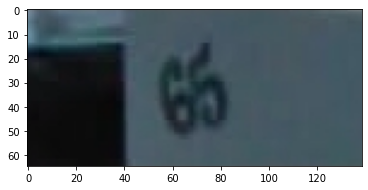

10016.png
Elapsed time = 4.24607515335083
[(6, 98.46746921539307), (6, 96.63769602775574), (6, 86.17719411849976), (1, 95.37277817726135), (1, 81.01193904876709)]


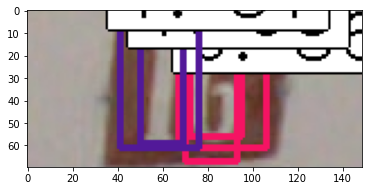

10017.png
Elapsed time = 4.258883714675903
[(1, 98.90046715736389), (1, 98.04648160934448), (1, 88.4683609008789), (1, 87.18531131744385), (1, 83.99965763092041), (1, 83.85790586471558)]


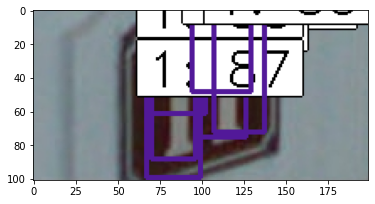

10018.png
Elapsed time = 4.78795313835144
[(5, 87.75859475135803), (5, 81.85524344444275), (1, 87.50759959220886), (3, 89.13503885269165), (6, 91.03779196739197)]


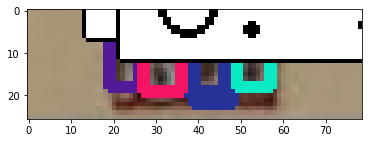

10019.png
Elapsed time = 4.416505813598633
[(8, 82.9662024974823), (3, 94.66786980628967), (1, 90.19938707351685)]


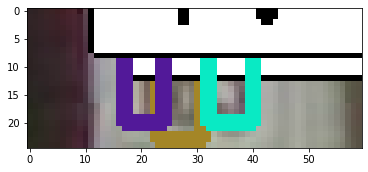

1002.png
Elapsed time = 4.371905326843262
[(1, 94.0149188041687), (1, 89.6368682384491)]


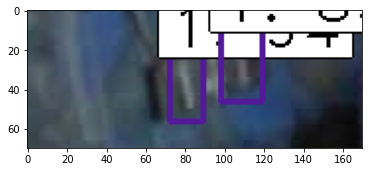

10020.png
Elapsed time = 4.2738196849823
[(5, 98.99829030036926), (5, 95.05378007888794), (5, 86.58471703529358), (7, 97.64476418495178), (7, 84.82842445373535), (1, 99.61857199668884), (1, 97.19512462615967), (1, 94.64847445487976), (1, 89.12186622619629)]


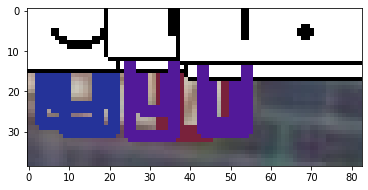

10021.png
Elapsed time = 4.428425312042236
[(8, 96.6654896736145), (8, 92.85789728164673), (5, 98.76249432563782), (5, 91.84482097625732), (1, 99.05712604522705), (1, 93.20632219314575)]


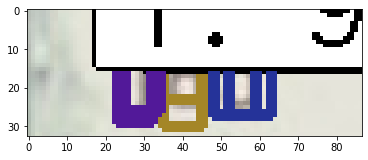

10022.png
Elapsed time = 4.1295764446258545
[(4, 93.75925660133362), (4, 89.08562660217285), (4, 86.52504086494446)]


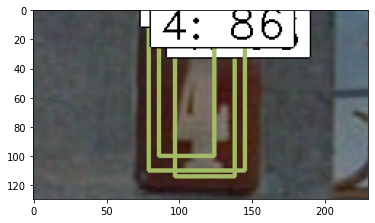

10023.png
Elapsed time = 4.185855388641357
[(1, 93.40541958808899), (1, 88.87907266616821), (1, 88.83785009384155), (1, 86.76521182060242)]


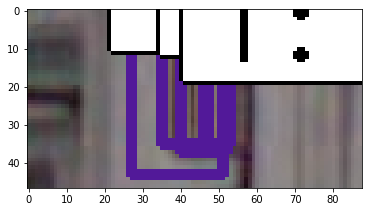

10024.png
Elapsed time = 4.774054288864136
[]


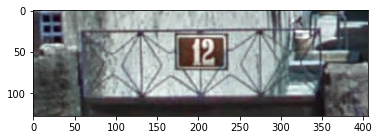

10025.png
Elapsed time = 4.637288570404053
[(3, 95.68825960159302), (3, 87.76690363883972), (3, 84.17010307312012)]


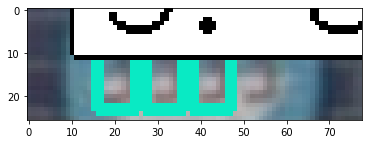

10026.png
Elapsed time = 4.8776304721832275
[(3, 95.87364196777344), (3, 93.58243942260742), (3, 82.90366530418396)]


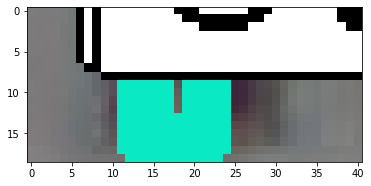

10027.png
Elapsed time = 4.178968906402588
[(1, 98.31268787384033), (1, 97.41554260253906), (1, 91.49138331413269), (1, 90.64006209373474), (5, 99.37437176704407), (5, 83.76617431640625), (5, 83.29113125801086), (5, 82.63961672782898)]


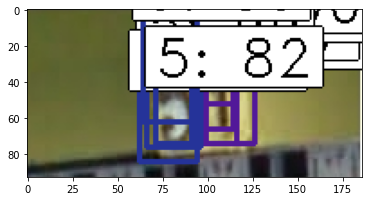

10028.png
Elapsed time = 4.5992209911346436
[(4, 98.1188714504242), (4, 93.85185241699219), (8, 95.13311386108398), (8, 91.48771166801453)]


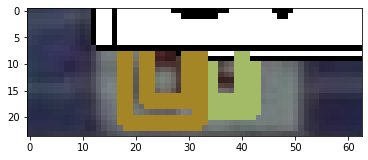

10029.png
Elapsed time = 4.266215801239014
[(1, 96.71105742454529)]


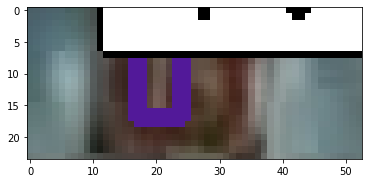

1003.png
Elapsed time = 4.339028835296631
[(3, 99.18286204338074), (3, 92.38193035125732), (5, 99.13877844810486), (5, 91.93302392959595), (5, 84.20798778533936), (0, 94.58571076393127)]


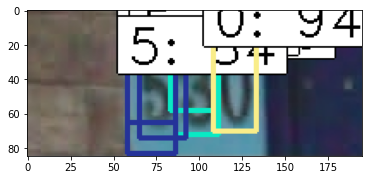

10030.png
Elapsed time = 4.234005928039551
[(3, 98.34043383598328), (3, 81.53225183486938)]


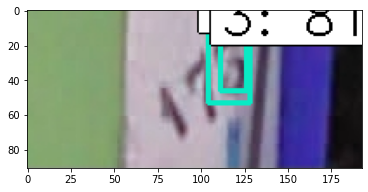

10031.png
Elapsed time = 4.224220275878906
[(1, 98.82895946502686), (1, 98.78976941108704), (1, 95.23376226425171), (1, 94.60253119468689), (1, 92.72140264511108), (1, 89.14304971694946), (1, 88.5686993598938), (1, 84.33336019515991)]


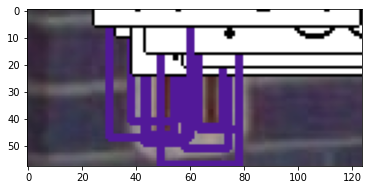

10032.png
Elapsed time = 4.160855293273926
[]


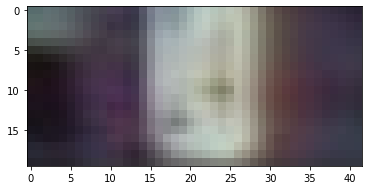

10033.png
Elapsed time = 4.199608087539673
[(1, 95.75801491737366), (1, 95.5384910106659), (1, 91.46742224693298), (1, 91.38429760932922), (1, 88.01804184913635)]


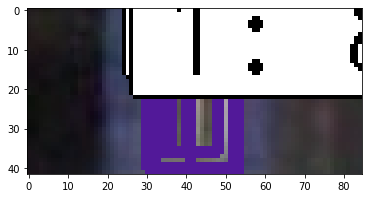

10034.png
Elapsed time = 5.026731252670288
[(2, 98.63135814666748), (2, 97.57457375526428), (2, 96.64884805679321), (2, 95.3774094581604), (2, 85.13031005859375), (2, 81.30750060081482), (4, 83.63769054412842)]


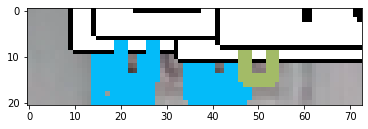

10035.png
Elapsed time = 4.283749103546143
[(7, 98.2930600643158), (7, 87.33026385307312), (7, 84.27650928497314), (7, 83.75322222709656)]


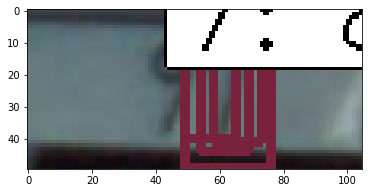

10036.png
Elapsed time = 4.442362308502197
[]


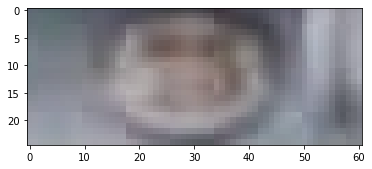

10037.png


KeyboardInterrupt: ignored

In [45]:
import roi_helpers 
all_imgs = []
classes = {}
bbox_threshold = 0.8
visualise = True
for idx, img_name in enumerate(sorted(os.listdir(img_path))):
  if not img_name.lower().endswith(('.bmp', '.jpeg', '.jpg', '.png', '.tif', '.tiff')):
    continue

  print(img_name)
  st = time.time()
  filepath = os.path.join(img_path,img_name)
  
  img = cv2.imread(filepath)
  X, ratio = format_img(img, config)
  
  X = np.transpose(X, (0, 2, 3, 1))
    
  # get the feature maps and output from the RPN
  [Y1, Y2, F] = model_rpn.predict(X)
	
  R = roi_helpers.rpn_to_roi(Y1, Y2, config, K.image_data_format(), overlap_thresh=0.7)

  # convert from (x1,y1,x2,y2) to (x,y,w,h)
  R[:, 2] -= R[:, 0]
  R[:, 3] -= R[:, 1]
  
  # apply the spatial pyramid pooling to the proposed regions
  bboxes = {}
  probs = {}
  
  for jk in range(R.shape[0]//config.num_rois + 1):
    ROIs = np.expand_dims(R[config.num_rois*jk:config.num_rois*(jk+1), :], axis=0)
    if ROIs.shape[1] == 0:
      break
      
    if jk == R.shape[0]//config.num_rois:
      #pad R

      curr_shape = ROIs.shape
      target_shape = (curr_shape[0],config.num_rois,curr_shape[2])
      ROIs_padded = np.zeros(target_shape).astype(ROIs.dtype)
      ROIs_padded[:, :curr_shape[1], :] = ROIs
      ROIs_padded[0, curr_shape[1]:, :] = ROIs[0, 0, :]
      ROIs = ROIs_padded
    
    [P_cls, P_regr] = model_classifier_only.predict([F, ROIs])
    for ii in range(P_cls.shape[1]):
      if np.max(P_cls[0, ii, :]) < bbox_threshold or np.argmax(P_cls[0, ii, :]) == (P_cls.shape[2] - 1):
        continue

      cls_name = class_mapping[np.argmax(P_cls[0, ii, :])]

      if cls_name not in bboxes:
        bboxes[cls_name] = []
        probs[cls_name] = []

      (x, y, w, h) = ROIs[0, ii, :]

      cls_num = np.argmax(P_cls[0, ii, :])
      try:
        (tx, ty, tw, th) = P_regr[0, ii, 4*cls_num:4*(cls_num+1)]
        tx /= C.classifier_regr_std[0]
        ty /= C.classifier_regr_std[1]
        tw /= C.classifier_regr_std[2]
        th /= C.classifier_regr_std[3]
        x, y, w, h = roi_helpers.apply_regr(x, y, w, h, tx, ty, tw, th)
      except:
        pass
      bboxes[cls_name].append([config.rpn_stride*x, config.rpn_stride*y, config.rpn_stride*(x+w), config.rpn_stride*(y+h)])
      probs[cls_name].append(np.max(P_cls[0, ii, :]))

  all_dets = []

  for key in bboxes:
    bbox = np.array(bboxes[key])

    new_boxes, new_probs = roi_helpers.non_max_suppression_fast(bbox, np.array(probs[key]), overlap_thresh=0.5)
    for jk in range(new_boxes.shape[0]):
      (x1, y1, x2, y2) = new_boxes[jk,:]
      
      (real_x1, real_y1, real_x2, real_y2) = get_real_coordinates(ratio, x1, y1, x2, y2)
      
      cv2.rectangle(img,(real_x1, real_y1), (real_x2, real_y2), (int(class_to_color[key][0]), int(class_to_color[key][1]), int(class_to_color[key][2])),2)

      textLabel = '{}: {}'.format(key,int(100*new_probs[jk]))
      all_dets.append((key,100*new_probs[jk]))

      (retval,baseLine) = cv2.getTextSize(textLabel,cv2.FONT_HERSHEY_COMPLEX,1,1)
      textOrg = (real_x1, real_y1-0)

      cv2.rectangle(img, (textOrg[0] - 5, textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (0, 0, 0), 2)
      cv2.rectangle(img, (textOrg[0] - 5,textOrg[1]+baseLine - 5), (textOrg[0]+retval[0] + 5, textOrg[1]-retval[1] - 5), (255, 255, 255), -1)
      cv2.putText(img, textLabel, textOrg, cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 0), 1)
  
  print('Elapsed time = {}'.format(time.time() - st))
  print(all_dets)
  import matplotlib.pyplot as plt
  plt.imshow(img)
  plt.show()
  # break

  # cv2.imshow('img', img)
	